**NAME** : Pratik Vijay Bhagyawant\
**CLASS** : BE-AIDS\
**ROLL No** : 2547008\
**Batch** : A\
**SUB** : Computer Laboratory II (Information Retrieval)

**Problem Statement**:Implement e-mail spam filtering using text classification algorithm with appropriate dataset. 

In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pillow


Requirement already up-to-date: pillow in ./.local/lib/python3.8/site-packages (10.4.0)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import nltk

In [8]:
df=pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [9]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
df.shape

(5728, 2)

In [11]:
df.dtypes

text    object
spam     int64
dtype: object

In [12]:
#if there are yes or no in spam column then do label encoder
lb=LabelEncoder()
df['spam']=lb.fit_transform(df['spam'])

In [13]:
df.duplicated().sum()

33

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5695, 2)

In [17]:
spam_count=df['spam'].value_counts()

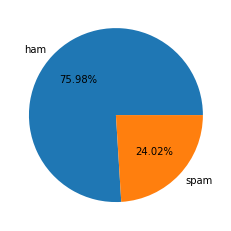

In [18]:
plt.pie(spam_count,autopct="%0.2f%%",labels=['ham','spam'])
plt.show()

In [19]:
stop_words=set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
lemma=WordNetLemmatizer()

def transfrom_text(text):
    text=text.lower()
    text=lemma.lemmatize(text)
    token=nltk.word_tokenize(text)
    y=[i for i in token if i.isalnum() and i not in stop_words]
    return " ".join(y)

In [21]:
df['transformed_text']=df['text'].apply(transfrom_text)

In [22]:
df.head()

,text,spam,transformed_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,subject 4 color printing special request addit...
4,"Subject: do not have money , get software cds ...",1,subject money get software cds software compat...


In [23]:
from wordcloud import WordCloud
wc=WordCloud()

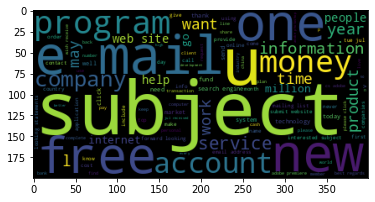

In [24]:
spam_wc=wc.generate(' '.join(df[df['spam']==1]['transformed_text']))
plt.imshow(spam_wc)

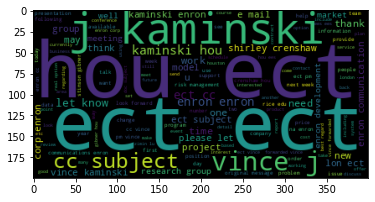

In [25]:
spam_wc=wc.generate(' '.join(df[df['spam']==0]['transformed_text']))
plt.imshow(spam_wc)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [27]:
x=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['spam'].values

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

In [30]:
accuracy_score(ytest,y_pred)*100

97.19051799824408

In [31]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       843
           1       0.99      0.90      0.94       296

    accuracy                           0.97      1139
   macro avg       0.98      0.95      0.96      1139
weighted avg       0.97      0.97      0.97      1139



<Axes: >

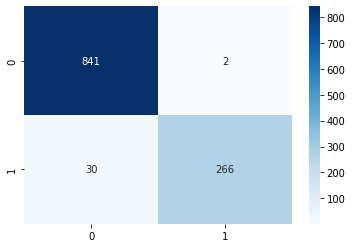

In [32]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')